In [1]:
import pandas as pd

# load data

In [3]:
data = pd.read_csv("StressLevelDataset.csv")
data.head()

anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2                     3           2   
1                  1  ...            2                     1           4   
2                  2  ...            2                     2           3   
3                  2  ...            2                     2           4   
4                  2  ...            3                     4           3   

   teacher_student_relationship  future_career_concerns  social_support  \
0                             3                       3               2   
1                             1                       5               1   
2                             3                       2               2   
3                             1                       4               1   
4                             1                       2               1   

   peer_pressure  extracurricular_activities  bullying  stress_level  
0              3                           3         2             1  
1              4                           5         5             2  
2              3                           2         2             1  
3              4                           4         5             2  
4              5                           0         5             1  

[5 rows x 21 columns]

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [4]:
data = pd.read_csv("StressLevelDataset.csv")
print(data.head())


   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2        

In [5]:
print(data.isnull().sum())


anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


In [6]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [7]:
print(data.columns)


Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')


In [8]:
print(data['stress_level'].value_counts())


stress_level
0    373
2    369
1    358
Name: count, dtype: int64


## EDA report

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


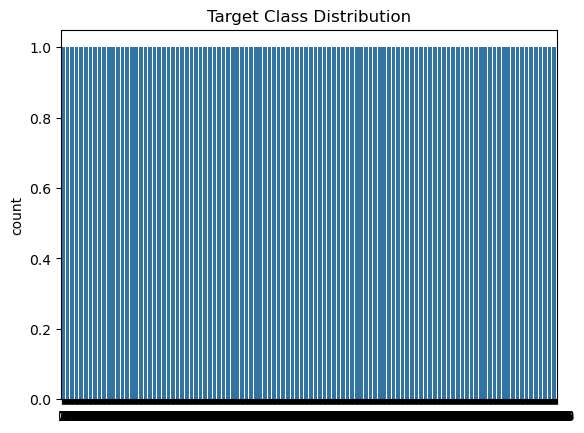

In [17]:
# 3. Target distribution
sns.countplot(data['stress_level'])  # Replace with your actual target column
plt.title("Target Class Distribution")
plt.show()

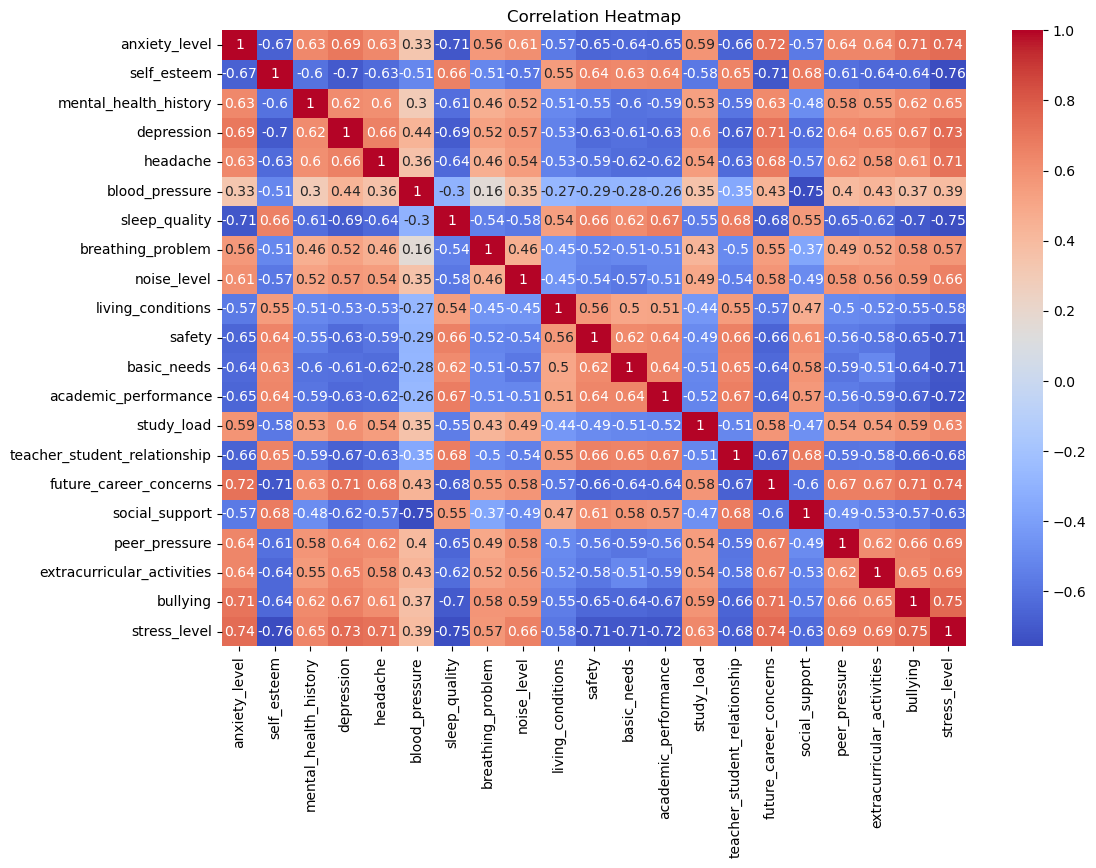

In [18]:
# 4. Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

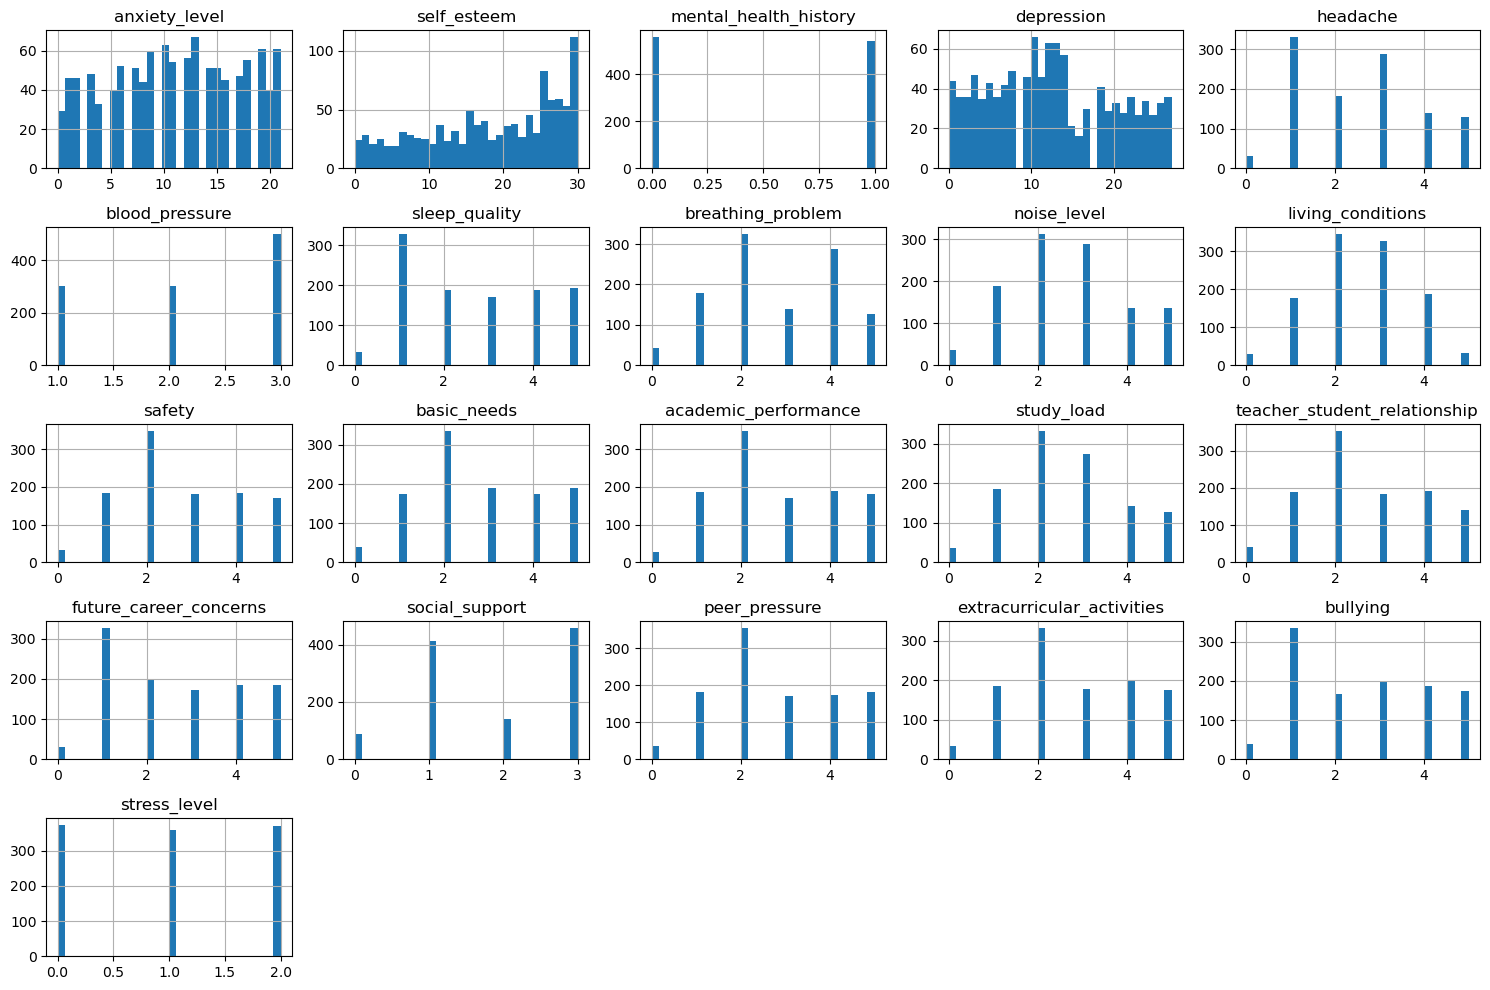

In [20]:

# 5. Histograms
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

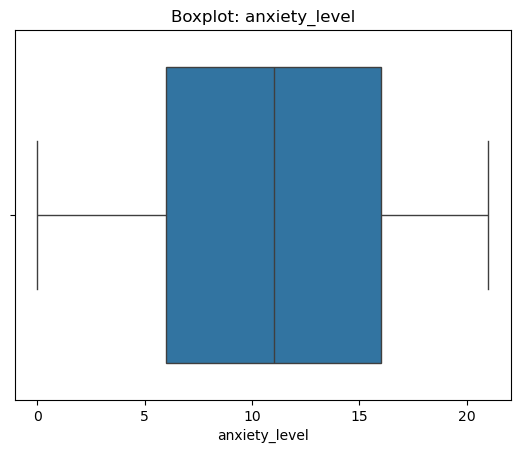

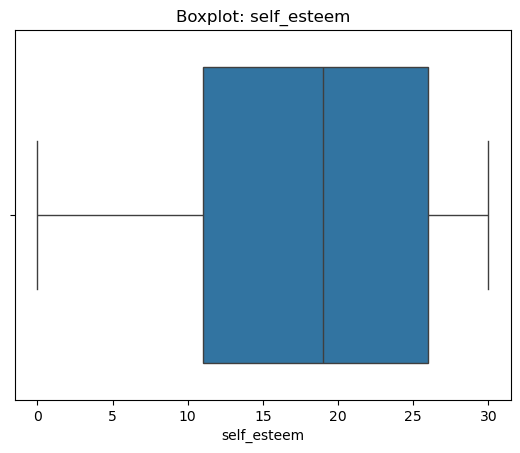

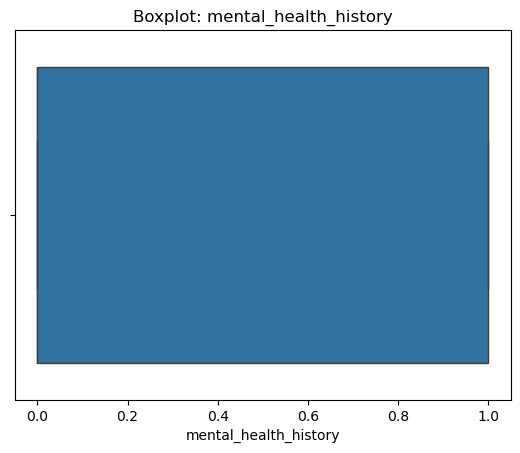

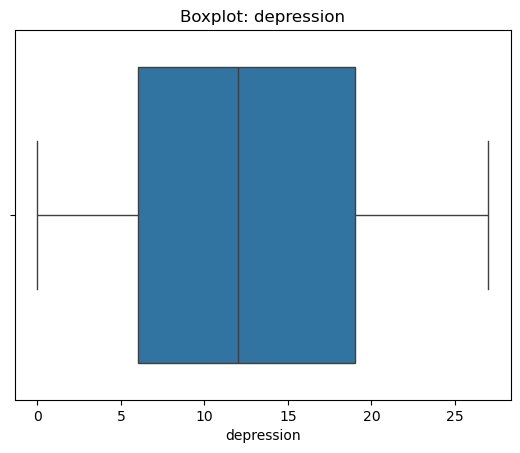

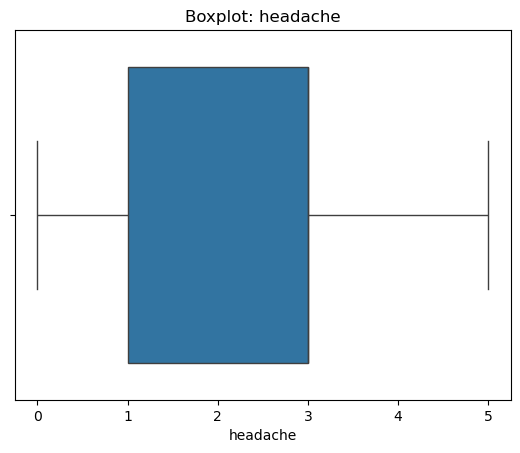

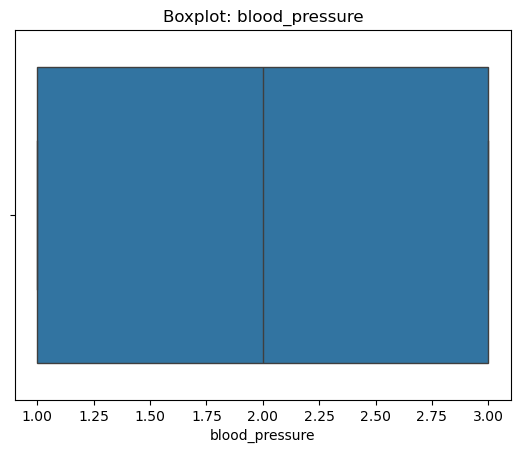

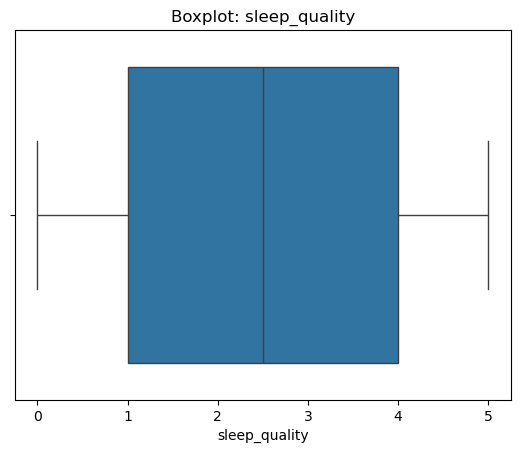

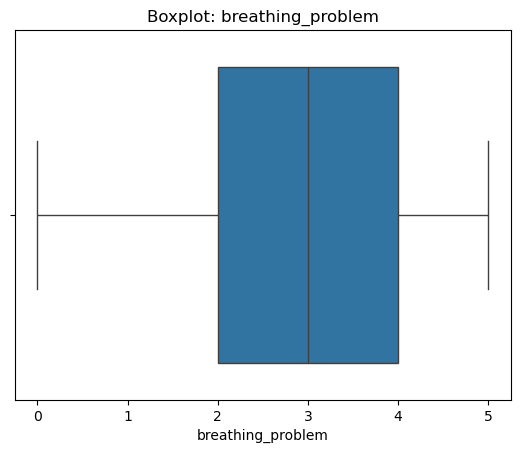

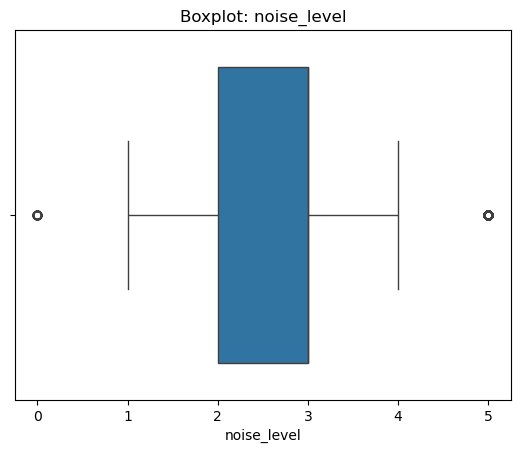

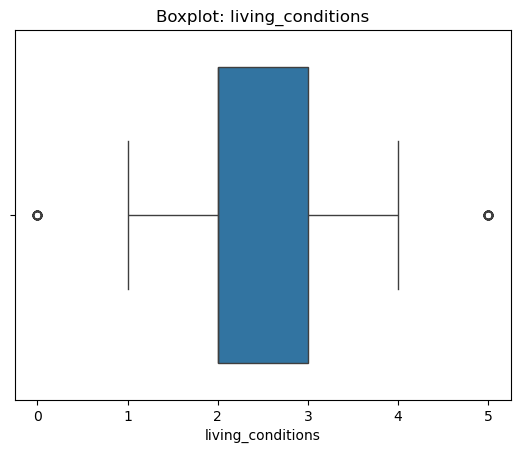

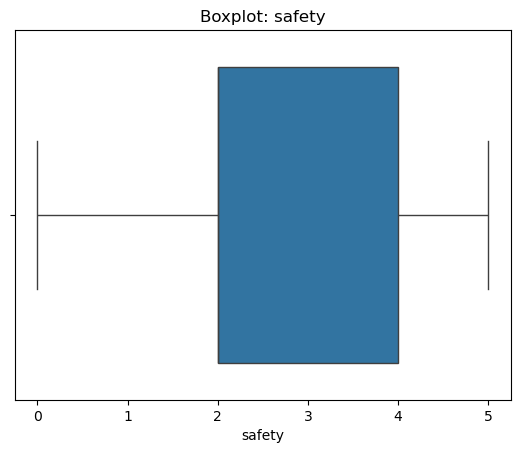

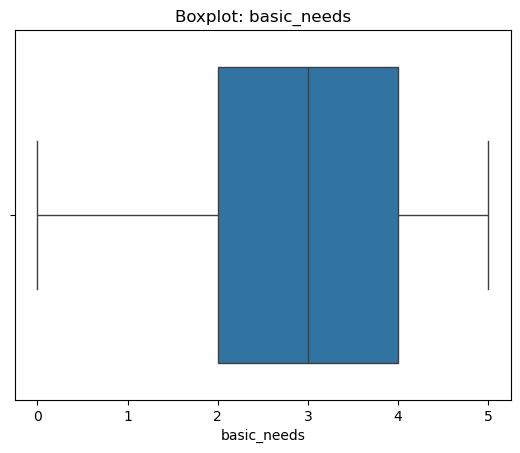

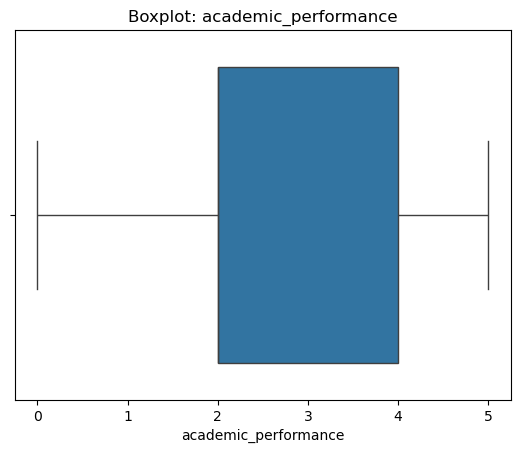

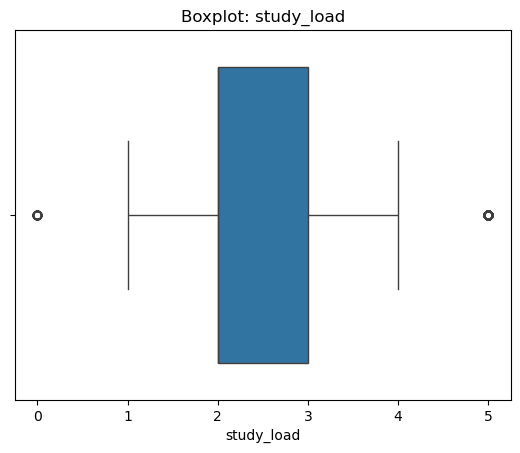

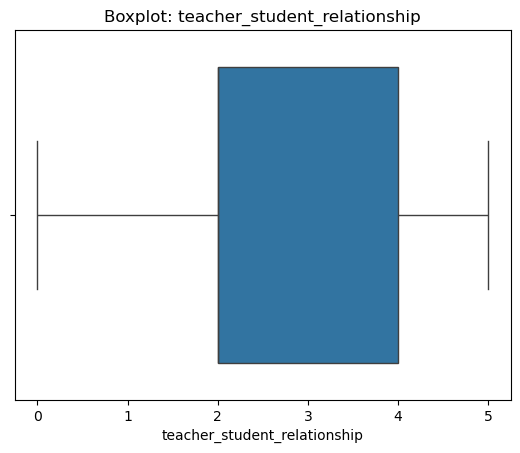

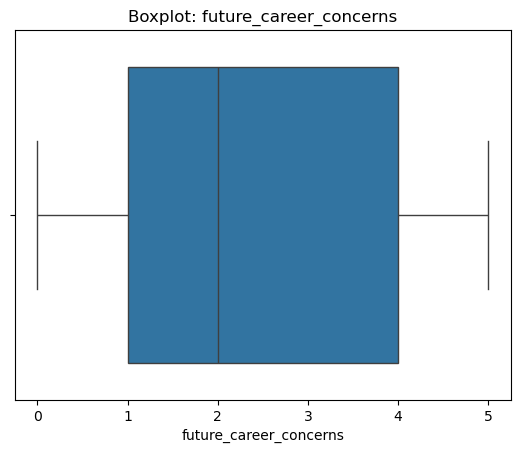

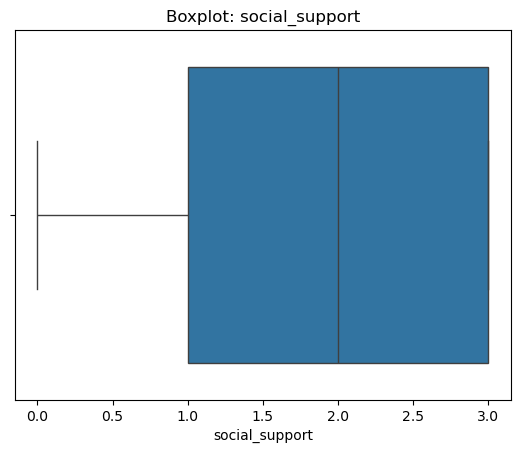

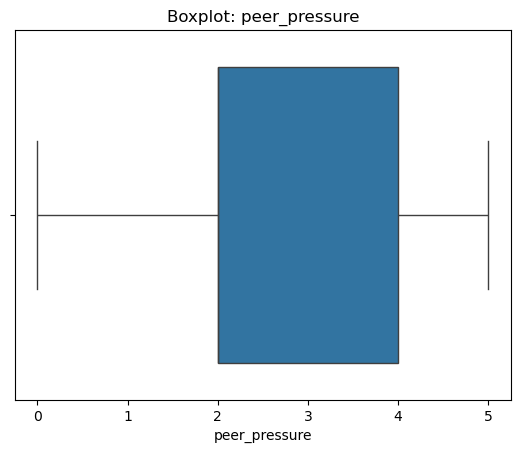

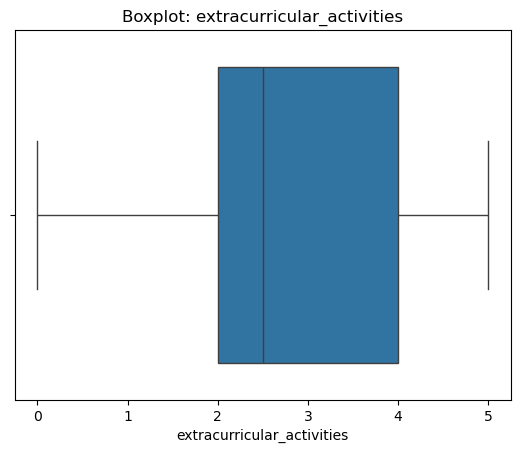

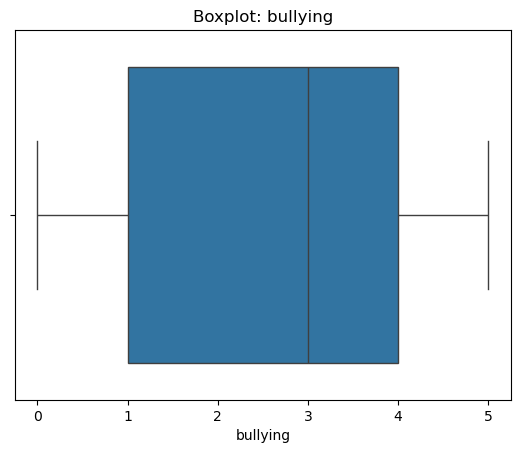

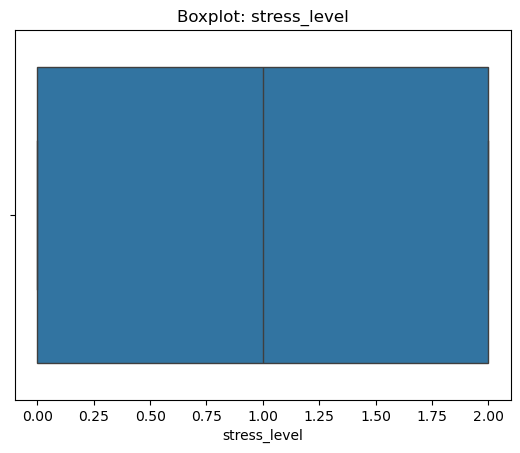

In [21]:
for col in data.select_dtypes(include='number').columns:
    plt.figure()
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot: {col}")
    plt.show()

## preprocessing

In [22]:
# Encode categorical features (if any)
data = pd.get_dummies(data)

# Drop rows with missing values
data = data.dropna()


In [23]:
X = data.drop("stress_level", axis=1)  # Features
y = data["stress_level"]               # Target


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [26]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87        76
           1       0.90      0.86      0.88        73
           2       0.88      0.86      0.87        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220

